# Project: Titanic_Machine Learning from Disaster
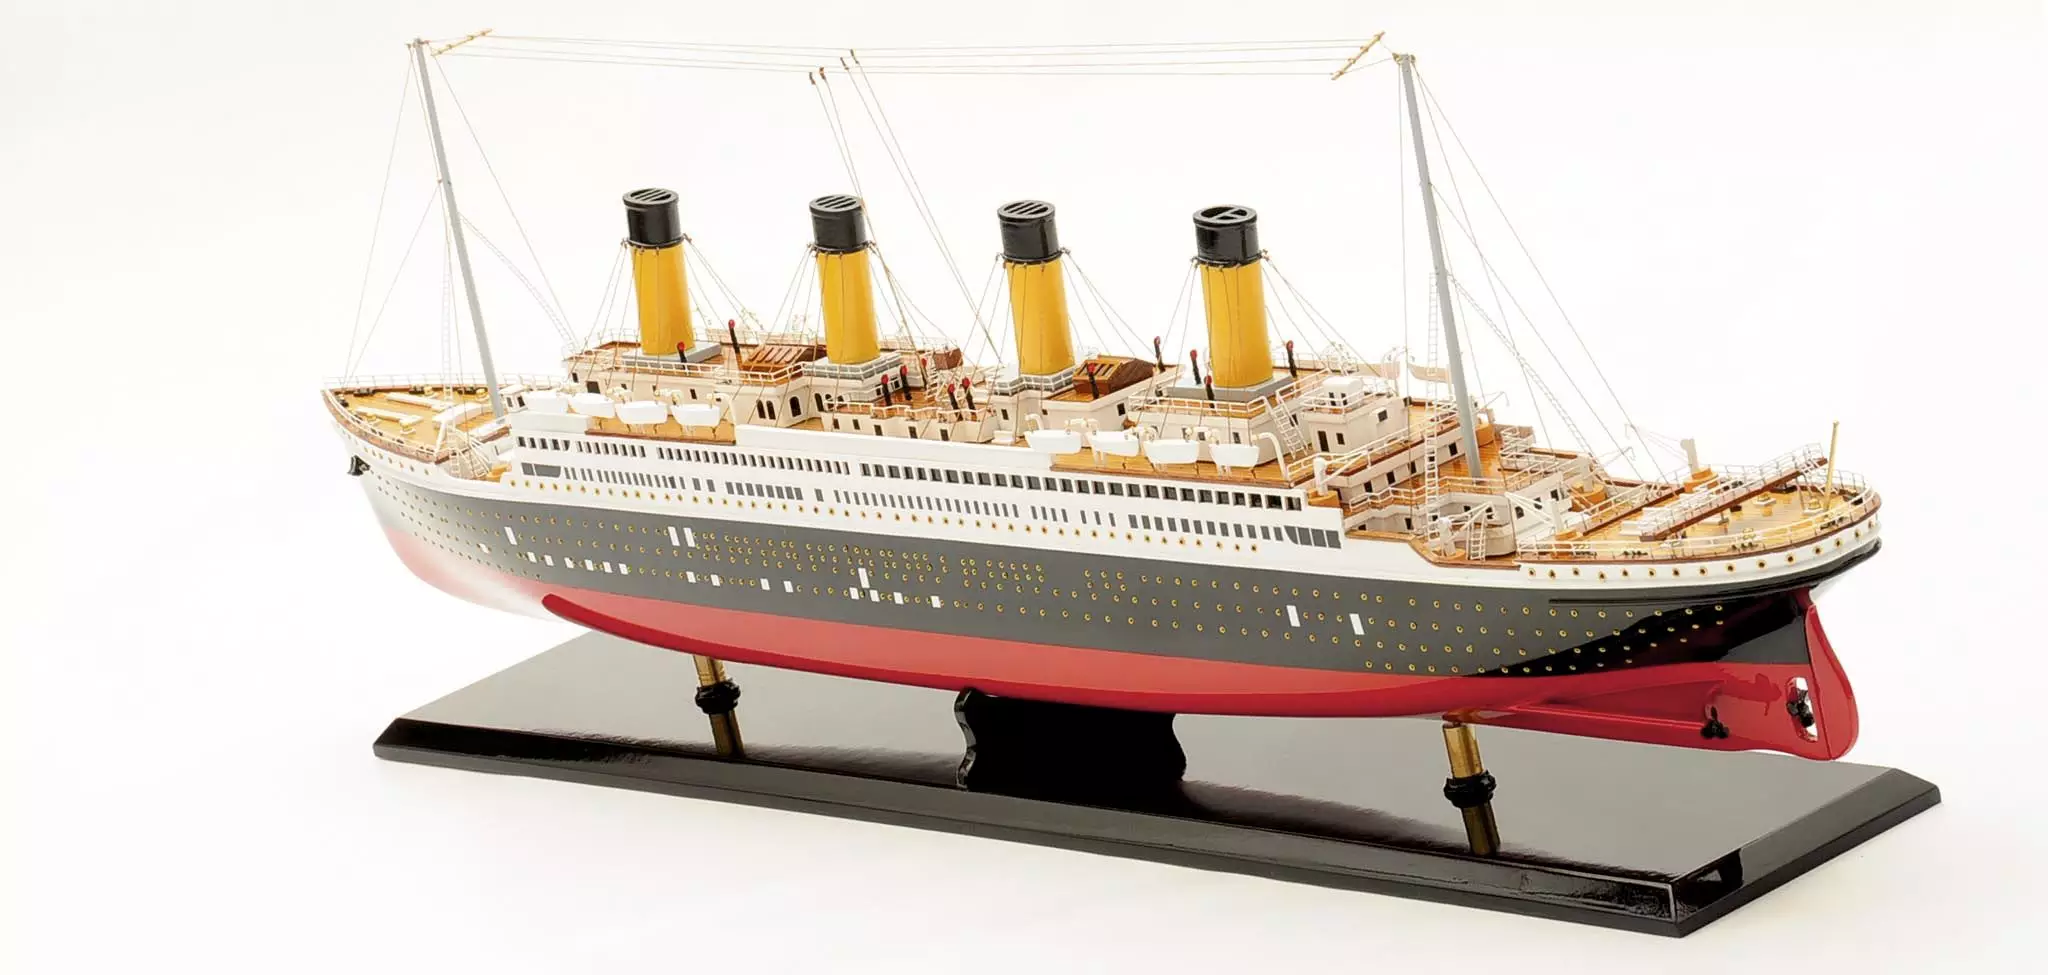

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv("C:/Users/ADMINH/Downloads/titanic/train.csv", index_col="PassengerId")
test_df = pd.read_csv("C:/Users/ADMINH/Downloads/titanic/test.csv", index_col="PassengerId")

In [3]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Note:
- family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)
- family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


- Categorical: Survived (chỉ gồm giá trị 0 và 1), Sex, Pclass, SibSp, Parch
    Embarked: Port of Embarkation - C = Cherbourg, Q = Queenstown, S = Southampton
- Numerical: (continuous) Age, Fare, (discrete)

- Mix types of data: Ticket, Cabin

- Contain Error/Typo: Name

- Blank or Null: Cabin > Age > Embarked

- Various Data Type: String, Int, Float

In [7]:
train_df["Survived"] = train_df["Survived"].astype("category")


In [8]:
train_df["Survived"].dtype

CategoricalDtype(categories=[0, 1], ordered=False)

In [9]:
features = ["Pclass", "Sex", "SibSp", "Parch", "Embarked"]
def convert_cat(df, features):
    for feature in features:
        df[feature] = df[feature].astype("category")
convert_cat(train_df, features)
convert_cat(test_df, features) 

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(6), float64(2), object(3)
memory usage: 48.2+ KB


## Distribution of numerical feature values

In [11]:
train_df.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


# Distribution of Categorical feature values

In [12]:
train_df.describe(include= "category")

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


#Exploratory Data Analysis (EDA)

In [97]:
train_df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [22]:
#tính phần trăm số người sống sót
train_df["Survived"].value_counts(normalize=  True).to_frame()

,Survived
0,0.616162
1,0.383838


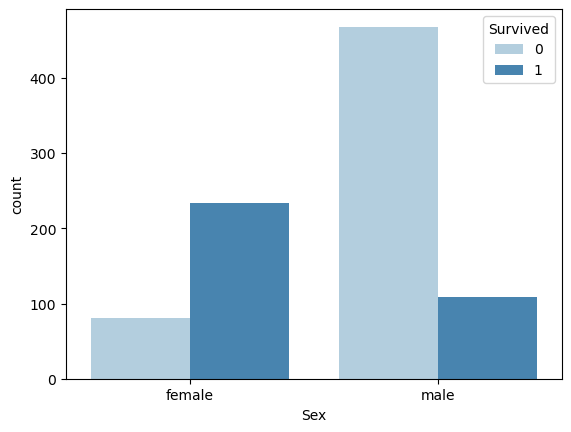

In [68]:
sns.countplot(data= train_df, x="Sex", hue="Survived", palette="Blues");

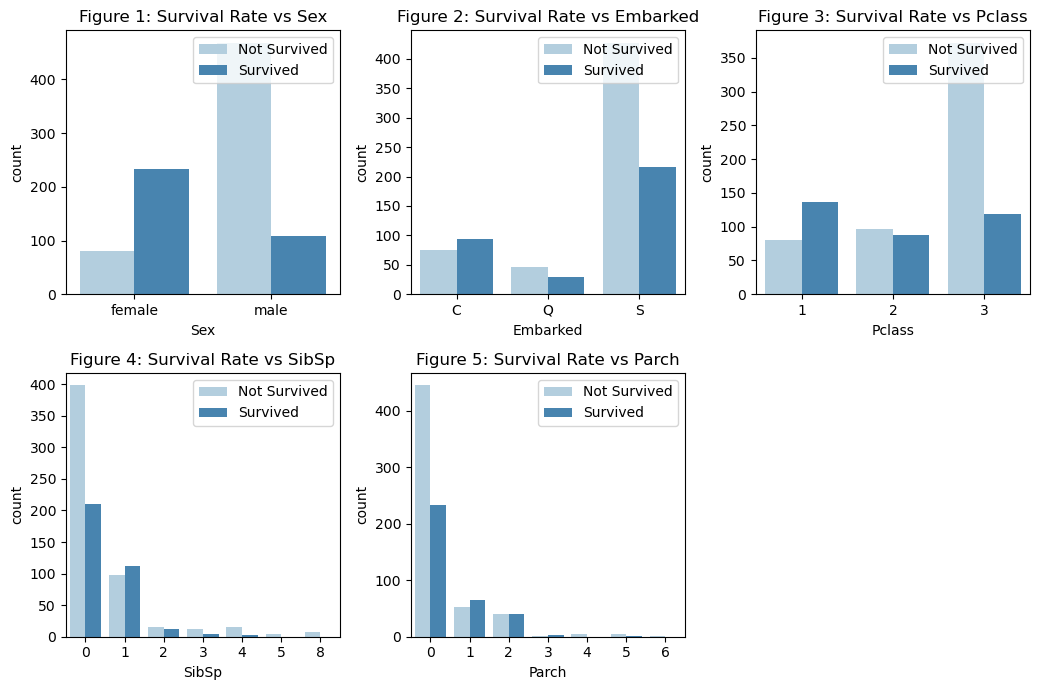

In [67]:
cols = ['Sex', 'Embarked', 'Pclass', 'SibSp', 'Parch']

n_rows = 2
n_cols = 3

fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*3.5, n_rows*3.5))

for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r*n_cols + c #index to loop through list "cols"
        if i < len(cols):
            ax_i = ax[r,c]
            sns.countplot(data=train_df, x=cols[i], hue="Survived", palette="Blues", ax=ax_i)
            ax_i.set_title(f"Figure {i+1}: Survival Rate vs {cols[i]}")
            ax_i.legend(title='', loc='upper right', labels=['Not Survived', 'Survived'])
ax.flat[-1].set_visible(False) #Remove the last subplot
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Count'>

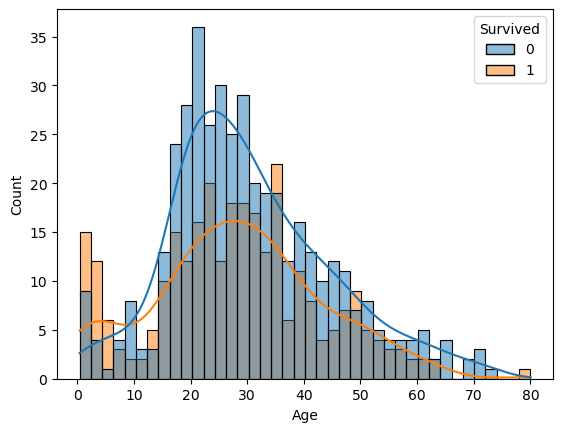

In [66]:
sns.histplot(data=train_df, x= "Age", hue="Survived", bins= 40, kde= True)

In [70]:
train_df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

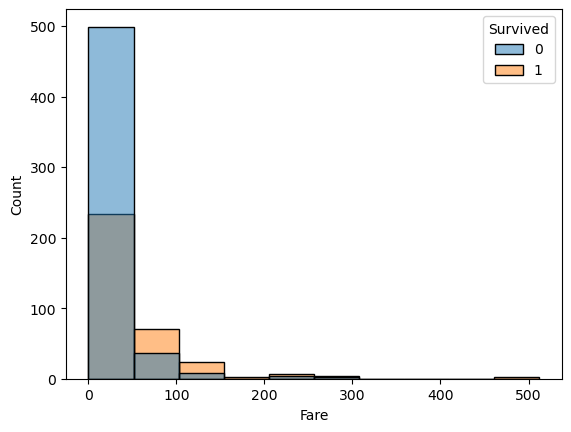

In [82]:
sns.histplot(data= train_df, x="Fare", hue="Survived", bins= 10);

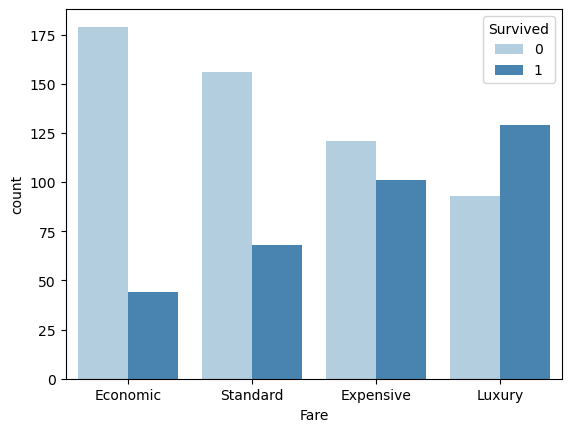

In [94]:
fare_categories = ['Economic', 'Standard', 'Expensive', 'Luxury']
quartile_data = pd.qcut(train_df['Fare'], 4, labels=fare_categories)

sns.countplot(x=quartile_data, hue=train_df['Survived'], palette='Blues');

In [103]:
train_df["Name"].head()

PassengerId
1                              Braund, Mr. Owen Harris
2    Cumings, Mrs. John Bradley (Florence Briggs Th...
3                               Heikkinen, Miss. Laina
4         Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                             Allen, Mr. William Henry
Name: Name, dtype: object